You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.
The tasks assigned to you are as follows.

1- There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2- You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
a. Identify number of sales for each fuel type
b. Identify which transmission type has more price outliers
3- Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
4- Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.

## Import Required Libraries

In [ ]:
%pip install seaborn
%pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read The Given Data

In [3]:
df = pd.read_csv('used_car_price.csv')
print(df.head(10))

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
5   Fiesta  2015       Manual    35432   Petrol  145.0  47.9         1.6   
6     Puma  2019       Manual     2029   Petrol  145.0  50.4         1.0   
7   Fiesta  2017       Manual    13054   Petrol  145.0  54.3         1.2   
8     Kuga  2019    Automatic     6894   Diesel  145.0  42.2         2.0   
9    Focus  2018       Manual    48141   Petrol  145.0  61.4         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
5  10500  
6  22500  
7   9000  
8  25500  
9  10000  


## Data Preparation and Cleaning

In [4]:
df.dtypes

model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [6]:
# The attribute 'tax' has three missing values
avg_tax = df['tax'].mean()
df['tax'].fillna(avg_tax, inplace=True)
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB
None


## Data Insights and Visualization

In [7]:
# Display top 5 attributes with highest correlation with the target attribute 'price'
corr_matrix = df.corr()
corr_price = corr_matrix['price'].abs().sort_values(ascending=False)
top5_corr = corr_price[1:6]
print(top5_corr)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


In [8]:
# Count the number of cars under each unique value of the 'fuelType' attribute
df["fuelType"].value_counts()

Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

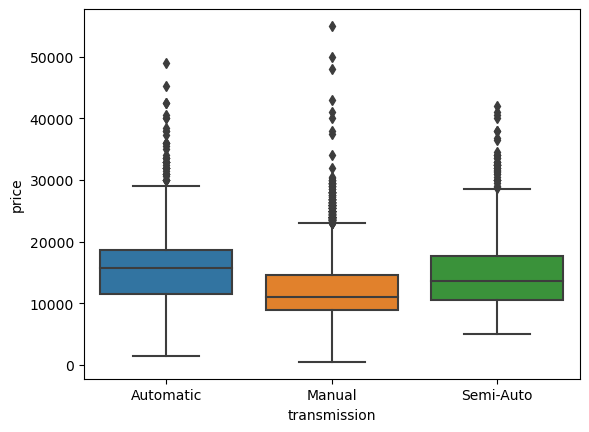

In [9]:
# Boxplot to determine the car types with the most price outliers
import seaborn as sns
sns.boxplot(data=df, x='transmission', y='price')
plt.xlabel('transmission')
plt.ylabel('price')
plt.show()

In [ ]:
# In the above graph, the Manual transmission type displayed the most price outliers

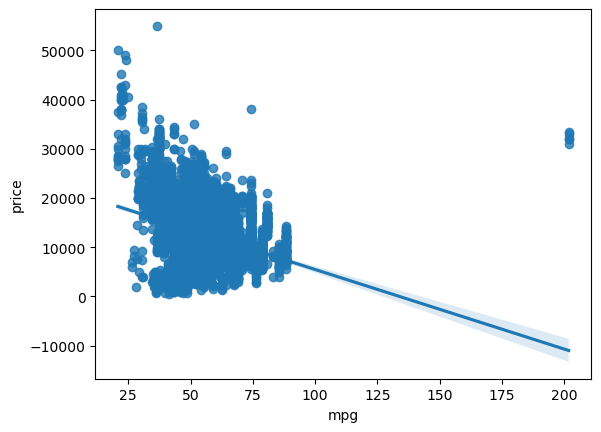

In [26]:
# Regression plot between The attribute 'mpg' and the target attribute 'price'
sns.regplot(data=df, x='mpg', y='price')
plt.xlabel('mpg')
plt.ylabel('price')
plt.show()

## Model Development and Evaluation

In [10]:
# Simple Linear Regression model to predict 'price' using the attribute 'mpg'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[["mpg"]]
y = df["price"]

model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination:", r2)

Mean Squared Error: 19741690.80944619
Coefficient of Determination: 0.11989802249624182


In [11]:
# Multiple Linear Regression model to predict 'price' using a specific set of attributes
X = df[['year','mileage','engineSize','tax','mpg']]
y = df['price']

lr = LinearRegression()
lr.fit(X,y)

y_pred = lr.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error(MSE):", mse)
print("Coefficient of Determination(R^2):", r2)

Mean Squared Error(MSE): 6134065.224381712
Coefficient of Determination(R^2): 0.7265379654547013


In [20]:
# Pipeline object model that uses standard scalar, polynomial features, and a linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['year','mileage','engineSize','tax','mpg']].astype('float')
y = df["price"]

input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(degree=2)), ('model',LinearRegression())]
pipe = Pipeline(input)
pipe.fit(X,y)

y_pred = pipe.predict(X)

mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print("Mean Squared Error(MSE):", mse)
print("Coefficient of Determination(R^2):", r2)

Mean Squared Error(MSE): 5234038.065462741
Coefficient of Determination(R^2): 0.7666619695239302


In [21]:
# Ridge regression object model with a regularization parameter of 0.1

from sklearn.linear_model import Ridge

X = df[['year','mileage','engineSize','tax','mpg']]
y = df['price']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error(MSE):", mse)
print("Coefficient of Determination(R^2):", r2)

Mean Squared Error(MSE): 6912725.801055018
Coefficient of Determination(R^2): 0.6917134446113096


In [22]:
# Ridge regression object model using a polynomial transformed training data
X = df[["year","mileage","engineSize","tax","mpg"]]
y = df["price"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly,y_train)

y_pred = ridge.predict(X_test_poly)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Squared Error(MSE):", mse)
print("Coefficient of Determination(R^2):", r2)

Mean Squared Error(MSE): 7326174.877587367
Coefficient of Determination(R^2): 0.6732748727221513


C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [25]:
# Grid Search on the ridge regression with 4-fold cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
X = df[["year","mileage","engineSize","tax","mpg"]]
y = df["price"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

param = {'alpha':[0.01,0.1,10,100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param, cv=4)
grid_search.fit(X_train_poly, y_train)

y_pred = grid_search.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error(MSE):", mse)
print("Coefficient of Determination(R^2):", r2)

Mean Squared Error(MSE): 13840985.984939095
Coefficient of Determination(R^2): 0.382734102974432


C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yourb\anaconda3\mylessons\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yourb\anaconda3\mylessons\lib\site-

In [27]:
df.to_csv('used_car_sale_price.csv')